# Introducción

Características del dataset:

Este conjunto de datos contiene más de 33,000 reseñas anónimas de tiendas de McDonald's en Estados Unidos, extraídas de reseñas de Google. Ofrece valiosa información sobre las experiencias y opiniones de los clientes acerca de varias ubicaciones de McDonald's en el país. El dataset incluye detalles como nombres de las tiendas, categorías, direcciones, coordenadas geográficas, calificaciones de las reseñas, textos de las reseñas y marcas de tiempo.

Para este caso solo trabajaremos con las columnas ID y Review.

Origen de los datos: https://www.kaggle.com/datasets/nelgiriyewithana/mcdonalds-store-reviews



Trabajaremos con las librerías:

* pandas
* nltk
* re

En esta Notebook veremos el siguiente contenido:

* Lectura de una base de datos
* Importación de la librería NLTK
* Normalizaremos los valores convirtiendo a minúscula el texto.
* Removeremos signos de puntuación
* Tokenización de una columna con cadena de caracteres.
* Removeremos Stopwords
* Aplicaremos Stemming en el texto
* Aplicaremos Lematización
* Obtendremos la frecuencia de las palabras.


Base de datos analizada con idioma inglés

# Librerías para limpieza de texto

### nltk (Natural Language Toolkit)

Es una librería especializada en procesamiento de lenguaje natural. Permite:

- Tokenizar textos (separarlos en palabras o frases).

- Remover stopwords (palabras vacías como “el”, “de”, “y”).

- Aplicar stemming (reducir palabras a su raíz).

- Realizar lematización (reducir palabras a su forma base real).

### re (expresiones regulares)
Es una librería de Python para buscar y manipular patrones en texto. Se usa mucho para:

- Remover símbolos, puntuación, números, menciones, URLs, etc.

- Reemplazar secuencias de texto por otras (ej: eliminar signos de puntuación).

# Lectura de la Base de Datos


In [3]:
# Importamos las librerías necesarias
import pandas as pd
#from google.colab import drive

!pip install -q gdown
import gdown
import re
import chardet


# Montamos Google Drive
#drive.mount('/content/drive')


In [13]:
# Configura pandas para mostrar todo el contenido de cada celda (sin truncar)
pd.set_option('display.max_colwidth', None)

# Para volver para atrás
# pd.reset_option('display.max_colwidth')


In [15]:
# Como sabemos que encoding tiene un archivo:

import chardet

# Abrimos el archivo en modo binario para analizar los primeros 10.000 bytes
with open('/content/drive/MyDrive/CODERHOUSE/EZE - Data Science III_ NLP & Deep Learning aplicado a Ciencia de Datos/BASE DE DATOS/McDonald_s_Reviews.csv', 'rb') as f:
    result = chardet.detect(f.read(10000))

print(result)


FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/CODERHOUSE/EZE - Data Science III_ NLP & Deep Learning aplicado a Ciencia de Datos/BASE DE DATOS/McDonald_s_Reviews.csv'

In [11]:
# OPCIÓN 1:
# Leemos el archivo CSV con pandas.
# En este caso se utiliza encoding='ISO-8859-1': Se usa esta codificación para evitar errores de lectura cuando el archivo contiene caracteres especiales que no están en UTF-8.

df = pd.read_csv('/content/drive/MyDrive/CODERHOUSE/EZE - Data Science III_ NLP & Deep Learning aplicado a Ciencia de Datos/BASE DE DATOS/McDonald_s_Reviews.csv', encoding='ISO-8859-1')

# Mostramos las primeras filas del DataFrame
df.head()"""

SyntaxError: incomplete input (759146980.py, line 8)

In [19]:
# OPCIÓN 2: Utilizamos gdown para que cada usuario que acceda a la notebook acceda a los datos sin necesidad de subir el dataset manualmente a su dispositivo.
https://drive.google.com/file/d/1eqJLGCIRI-YFASVMpaLKyk-UUZDjLKqD/view?usp=sharing


# ID del archivo compartido en Google Drive
file_id = '1eqJLGCIRI-YFASVMpaLKyk-UUZDjLKqD'
url = f'https://drive.google.com/uc?id={file_id}'

# Descargamos el archivo con gdown
gdown.download(url, 'McDonald_s_Reviews.csv', quiet=False)

# Leemos el archivo CSV descargado
df = pd.read_csv('McDonald_s_Reviews.csv', encoding='ISO-8859-1')

# Mostramos las primeras filas
df.head(10)

SyntaxError: invalid decimal literal (1748460358.py, line 2)

In [16]:
# Opción 3: utilizamos regex para que detectar el id. Usamos re.search() (módulo re de expresiones regulares) para buscar cualquier texto entre /d/ y el próximo /.
# Devuelve el ID sin importar que tenga parámetros como ?usp=sharing, etc.
link = 'https://drive.google.com/file/d/1eqJLGCIRI-YFASVMpaLKyk-UUZDjLKqD/view?usp=sharing'

#re.search() es una función que busca un patrón dentro de una cadena de texto.
#r'/d/([a-zA-Z0-9_-]+)' es el patrón que se está buscando. Esto es una expresión regular que busca una secuencia específica de caracteres.
# La expresión busca una parte del texto que comience con "/d/" seguido de letras, números, guiones o guiones bajos
#link es la cadena de texto dentro de la cual se está buscando.
#.group(1) extrae una parte específica del patrón encontrado llamada grupo de captura.

file_id = re.search(r'/d/([a-zA-Z0-9_-]+)', link).group(1)

# Creamos la URL de descarga directa usando el file ID
url = f'https://drive.google.com/uc?id={file_id}'

# Descargamos el archivo con gdown
gdown.download(url, 'McDonald_s_Reviews.csv')

# Leemos el archivo CSV descargado en un DataFrame de Pandas
# 'encoding='ISO-8859-1'' especifica la codificación del archivo para evitar errores
df = pd.read_csv('McDonald_s_Reviews.csv', encoding='ISO-8859-1')

# Mostramos las primeras 10 filas del DataFrame para una vista previa
df.head(10)

SSLError: HTTPSConnectionPool(host='drive.google.com', port=443): Max retries exceeded with url: /uc?id=1eqJLGCIRI-YFASVMpaLKyk-UUZDjLKqD (Caused by SSLError(SSLCertVerificationError(1, '[SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: unable to get local issuer certificate (_ssl.c:1006)')))

In [ ]:
# Detectamos la codificación del documento utilizando chardet

output_file = 'IMDB_esp.csv'

gdown.download(url, output_file, quiet=False)

# Paso 3: Detectar el encoding con chardet
with open(output_file, 'rb') as f:
    result = chardet.detect(f.read())
    detected_encoding = result['encoding']
    print(f"Codificación detectada: {detected_encoding}")

Downloading...
From: https://drive.google.com/uc?id=1eqJLGCIRI-YFASVMpaLKyk-UUZDjLKqD
To: /content/IMDB_esp.csv
100%|██████████| 9.14M/9.14M [00:00<00:00, 26.4MB/s]


Codificación detectada: ISO-8859-1


In [ ]:
# Reduciremos el df utilizando solo las columnas que nos interesan.

df = df[["reviewer_id", "review","rating"]]

In [ ]:
# Visualizamos algunas de las reviews.

# La número 49
print(df.loc[50, 'review'])
print("\n" + "-"*80 + "\n")  # línea separadora


# La número 300
print(df.loc[301, 'review'])
print("\n" + "-"*80 + "\n")  # línea separadora


# La número 5000
print(df.loc[5001, 'review'])
print("\n" + "-"*80 + "\n")  # línea separadora


I went to this location tonight to see if they could give me the Oreo Mcflurry that a different McDonaldï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½s had forgotten earlier they completely refused. Unbelievable.. Itï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½s ice creamï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï

--------------------------------------------------------------------------------

Very bad service!!

--------------------------------------------------------------------------------

Good 

--------------------------------------------------------------------------------



# Normalizamos los valores pasando todo el texto a minúscula.

In [ ]:
#  ¿Qué hace .lower()? Convierte todo el texto a minúsculas.

# No necesitás importar ninguna librería para usar .lower(), ya que es un método incorporado en los objetos de tipo str en Python.
# Esto significa que cualquier texto (cadena de caracteres) puede convertirse a minúsculas directamente con .lower().
#  Es útil para normalizar texto antes de analizarlo o procesarlo.

df['review_lower'] = df['review'].apply(lambda text: text.lower())


/tmp/ipython-input-10-1075401077.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['review_lower'] = df['review'].apply(lambda text: text.lower())


In [ ]:
# previsualizamos ambas columnas de review para obtener una comparativa.
df

,reviewer_id,review,rating,review_lower
0,1,"Why does it look like someone spit on my food?\nI had a normal transaction, everyone was chill and polite, but now i dont want to eat this. Im trying not to think about what this milky white/clear substance is all over my food, i d*** sure am not coming back.",1 star,"why does it look like someone spit on my food?\ni had a normal transaction, everyone was chill and polite, but now i dont want to eat this. im trying not to think about what this milky white/clear substance is all over my food, i d*** sure am not coming back."
1,2,"It'd McDonalds. It is what it is as far as the food and atmosphere go. The staff here does make a difference. They are all friendly, accommodating and always smiling. Makes for a more pleasant experience than many other fast food places.",4 stars,"it'd mcdonalds. it is what it is as far as the food and atmosphere go. the staff here does make a difference. they are all friendly, accommodating and always smiling. makes for a more pleasant experience than many other fast food places."
2,3,Made a mobile order got to the speaker and checked it in.\nLine was not moving so I had to leave otherwise Iï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½d be late for work.\nNever got the refund in the app.\nI called them and they said I could only get my money back in person because it was stuck in the system.\nWent there in person the next day and the manager told me she wasnï¿,1 star,made a mobile order got to the speaker and checked it in.\nline was not moving so i had to leave otherwise iï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½d be late for work.\nnever got the refund in the app.\ni called them and they said i could only get my money back in person because it was stuck in the system.\nwent there in person the next day and the manager told me she wasnï¿
3,4,My mc. Crispy chicken sandwich was ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ customer service was quick and p,5 stars,my mc. crispy chicken sandwich was ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ customer service was quick and p
4,5,"I repeat my order 3 times in the drive thru, and she still manage to mess it up , it was suppose to be a large meal double filet of fish with large fries , no cheese . It was all wrong , they either need to pay close attention to the order being made , understand English or they need not to work at a drive thru",1 star,"i repeat my order 3 times in the drive thru, and she still manage to mess it up , it was suppose to be a large meal double filet of fish with large fries , no cheese . it was all wrong , they either need to pay close attention to the order being made , understand english or they need not to work at a drive thru"
...,...,...,...,...
33391,33392,They treated me very badly.,1 star,they treated me very badly.
33392,33393,The service is very good,5 stars,the service is very good
33393,33394,To remove hunger is enough,4 stars,to remove hunger is enough
33394,33395,"It's good, but lately it has become very expensive.",5 stars,"it's good, but lately it has become very expensive."


# Quitamos signos de puntuación

In [ ]:
import re

# Definir una función que remueva los signos de puntuación usando re
def remove_punctuation(text):
    # Expresión regular para reemplazar cualquier signo de puntuación o símbolo no alfanumérico
     return re.sub(r'[^a-zA-Z0-9\s]', '', text)

# Aplicar la función a la columna 'review_lower'
df['review_puntuacion'] = df['review_lower'].apply(remove_punctuation)

""" La expresión regular [^a-zA-Z0-9\s] selecciona cualquier carácter que no pertenezca a las letras (mayúsculas o minúsculas), números del 0 al 9, o espacios en blanco.

Los corchetes [] definen una clase de caracteres.

El ^ al inicio niega la clase, o sea, busca lo que no está dentro.

a-zA-Z incluye todas las letras del alfabeto.

0-9 incluye todos los dígitos.

\s representa cualquier carácter de espacio (como espacio, tab, salto de línea)."""

In [ ]:
# Previsualizamos algunos ejemplos
df.head(50)

,reviewer_id,review,rating,review_lower,review_puntuacion
0,1,"Why does it look like someone spit on my food?\nI had a normal transaction, everyone was chill and polite, but now i dont want to eat this. Im trying not to think about what this milky white/clear substance is all over my food, i d*** sure am not coming back.",1 star,"why does it look like someone spit on my food?\ni had a normal transaction, everyone was chill and polite, but now i dont want to eat this. im trying not to think about what this milky white/clear substance is all over my food, i d*** sure am not coming back.",why does it look like someone spit on my food\ni had a normal transaction everyone was chill and polite but now i dont want to eat this im trying not to think about what this milky whiteclear substance is all over my food i d sure am not coming back
1,2,"It'd McDonalds. It is what it is as far as the food and atmosphere go. The staff here does make a difference. They are all friendly, accommodating and always smiling. Makes for a more pleasant experience than many other fast food places.",4 stars,"it'd mcdonalds. it is what it is as far as the food and atmosphere go. the staff here does make a difference. they are all friendly, accommodating and always smiling. makes for a more pleasant experience than many other fast food places.",itd mcdonalds it is what it is as far as the food and atmosphere go the staff here does make a difference they are all friendly accommodating and always smiling makes for a more pleasant experience than many other fast food places
2,3,Made a mobile order got to the speaker and checked it in.\nLine was not moving so I had to leave otherwise Iï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½d be late for work.\nNever got the refund in the app.\nI called them and they said I could only get my money back in person because it was stuck in the system.\nWent there in person the next day and the manager told me she wasnï¿,1 star,made a mobile order got to the speaker and checked it in.\nline was not moving so i had to leave otherwise iï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½d be late for work.\nnever got the refund in the app.\ni called them and they said i could only get my money back in person because it was stuck in the system.\nwent there in person the next day and the manager told me she wasnï¿,made a mobile order got to the speaker and checked it in\nline was not moving so i had to leave otherwise id be late for work\nnever got the refund in the app\ni called them and they said i could only get my money back in person because it was stuck in the system\nwent there in person the next day and the manager told me she wasn
3,4,My mc. Crispy chicken sandwich was ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ customer service was quick and p,5 stars,my mc. crispy chicken sandwich was ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ customer service was quick and p,my mc crispy chicken sandwich was customer service was quick and p
4,5,"I repeat my order 3 times in the drive thru, and she still manage to mess it up , it was suppose to be a large meal double filet of fish with large fries , no cheese . It was all wrong , they either need to pay close attention to the order being made , understand English or they need not to work at a drive thru",1 star,"i repeat my order 3 times in the drive thru, and she still manage to mess it up , it was suppose to be a large meal double filet of fish with large fries , no cheese . it was all wrong , they either need to pay close attention to the order being made , understand english or they need not to work at a drive thru",i repeat my order 3 times in the drive thru and she still manage to mess it up it was suppose to be a large meal double filet of fish with large fries no cheese it was all wrong t

In [ ]:
# Aplicamos regex también en la columna rating para remover los términos star y stars dejando solamente los valores numéricos
df["rating"] = df["rating"].str.extract(r'(\d+)')

In [ ]:
# Convertimos la columna rating a valor numérico
df['rating'] = pd.to_numeric(df['rating'], errors='coerce')


In [ ]:
#Previsualizamos
df["rating"]

,rating
0,1
1,4
2,1
3,5
4,1
...,...
33391,1
33392,5
33393,4
33394,5


# Tokenización
## Definición:
La tokenización consiste en dividir un texto en unidades pequeñas llamadas tokens, que generalmente son palabras, aunque también pueden ser frases, oraciones o caracteres, dependiendo del contexto.

## Ejemplo:
Texto original: "Me encantó la Big Mac de McDonald's."

Tokens: ["Me", "encantó", "la", "Big", "Mac", "de", "McDonald", "'s", "."]

## ¿Para qué sirve?
Es un paso inicial obligatorio en casi cualquier tarea de procesamiento de lenguaje natural (NLP), ya que permite trabajar con cada palabra por separado: contar frecuencias, aplicar modelos, buscar significados, etc.


In [ ]:
# Importamos las librerías necesarias
import nltk

nltk.download('punkt')  # Descargamos el paquete de tokenización de NLTK
nltk.download('punkt_tab')  # Descargamos el paquete de tokenización de NLTK
from nltk.tokenize import word_tokenize # Desde el módulo nltk.tokenize, quiero importar solo la función word_tokenize

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


In [ ]:
# Tokenizamos los valores de la columna 'review'
df['review_tokenizado'] = df['review_puntuacion'].apply(word_tokenize)


In [ ]:
# Configuramos pandas para mostrar el contenido completo de las columnas
pd.set_option('display.max_colwidth', None)



In [ ]:
# Mostramos las primeras filas con la columna original y de la columna tokenizada
df[['review', 'review_tokenizado']].head()

,review,review_tokenizado
0,"Why does it look like someone spit on my food?\nI had a normal transaction, everyone was chill and polite, but now i dont want to eat this. Im trying not to think about what this milky white/clear substance is all over my food, i d*** sure am not coming back.","[why, does, it, look, like, someone, spit, on, my, food, i, had, a, normal, transaction, everyone, was, chill, and, polite, but, now, i, dont, want, to, eat, this, im, trying, not, to, think, about, what, this, milky, whiteclear, substance, is, all, over, my, food, i, d, sure, am, not, coming, back]"
1,"It'd McDonalds. It is what it is as far as the food and atmosphere go. The staff here does make a difference. They are all friendly, accommodating and always smiling. Makes for a more pleasant experience than many other fast food places.","[itd, mcdonalds, it, is, what, it, is, as, far, as, the, food, and, atmosphere, go, the, staff, here, does, make, a, difference, they, are, all, friendly, accommodating, and, always, smiling, makes, for, a, more, pleasant, experience, than, many, other, fast, food, places]"
2,Made a mobile order got to the speaker and checked it in.\nLine was not moving so I had to leave otherwise Iï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½d be late for work.\nNever got the refund in the app.\nI called them and they said I could only get my money back in person because it was stuck in the system.\nWent there in person the next day and the manager told me she wasnï¿,"[made, a, mobile, order, got, to, the, speaker, and, checked, it, in, line, was, not, moving, so, i, had, to, leave, otherwise, id, be, late, for, work, never, got, the, refund, in, the, app, i, called, them, and, they, said, i, could, only, get, my, money, back, in, person, because, it, was, stuck, in, the, system, went, there, in, person, the, next, day, and, the, manager, told, me, she, wasn]"
3,My mc. Crispy chicken sandwich was ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ customer service was quick and p,"[my, mc, crispy, chicken, sandwich, was, customer, service, was, quick, and, p]"
4,"I repeat my order 3 times in the drive thru, and she still manage to mess it up , it was suppose to be a large meal double filet of fish with large fries , no cheese . It was all wrong , they either need to pay close attention to the order being made , understand English or they need not to work at a drive thru","[i, repeat, my, order, 3, times, in, the, drive, thru, and, she, still, manage, to, mess, it, up, it, was, suppose, to, be, a, large, meal, double, filet, of, fish, with, large, fries, no, cheese, it, was, all, wrong, they, either, need, to, pay, close, attention, to, the, order, being, made, understand, english, or, they, need, not, to, work, at, a, drive, thru]"


In [ ]:
# Restauramos la configuración predeterminada de pandas para el ancho de las columnas
pd.reset_option('display.max_colwidth')

# Remover Stopwords
## Definición:
El proceso de remover stopwords consiste en eliminar las palabras vacías que no aportan un valor significativo al análisis del texto. Estas palabras incluyen artículos, preposiciones, conjunciones y otros términos comunes que suelen ser irrelevantes para tareas de procesamiento de texto.

## Ejemplo:
Texto original: "El perro corre rápidamente hacia el parque."

Tokens: ["El", "perro", "corre", "rápidamente", "hacia", "el", "parque"]

Después de remover las stopwords ("El", "hacia", "el"):

Tokens sin stopwords: ["perro", "corre", "rápidamente", "parque"]

## ¿Para qué sirve?
Remover stopwords ayuda a reducir el ruido en el texto y mejora la precisión en tareas como el análisis de sentimientos, clasificación de texto y búsqueda de información. Al eliminar palabras que no aportan mucho significado, se hace más fácil encontrar patrones útiles en el texto.

In [ ]:
# Previsualizamos algunas stopwords previstas en la librería.

import nltk
nltk.download('stopwords')

from nltk.corpus import stopwords

# Obtenemos el listado de stopwords en español
stopwords_es = stopwords.words('spanish')

# Mostramos las primeras 20
print(stopwords_es[:20])

[nltk_data] Downloading package stopwords to /root/nltk_data...


['de', 'la', 'que', 'el', 'en', 'y', 'a', 'los', 'del', 'se', 'las', 'por', 'un', 'para', 'con', 'no', 'una', 'su', 'al', 'lo']


[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
# Previsualizamos algunas stopwords previstas en la librería.

import nltk
nltk.download('stopwords')

from nltk.corpus import stopwords

# Obtenemos el listado de stopwords en español
stopwords_eng = stopwords.words('english')

# Mostramos las primeras 20
print(stopwords_es[:20])

['de', 'la', 'que', 'el', 'en', 'y', 'a', 'los', 'del', 'se', 'las', 'por', 'un', 'para', 'con', 'no', 'una', 'su', 'al', 'lo']


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Filtro Stopwords

In [ ]:
# Importamos stopwords de NLTK (Pueden importarse tanto para español como para inglés)
nltk.download('stopwords') # Descargamos el paquete de stopwords de NLTK para poder usarlas en el código
from nltk.corpus import stopwords # Importamos el módulo de stopwords desde NLTK, que contiene listas de palabras vacías

# Lista de stopwords en inglés
stop_words = set(stopwords.words('english')) # Creamos un conjunto de stopwords en inglés usando NLTK

# Función para eliminar stopwords de los tokens
# Aplicamos una función lambda a cada fila de la columna 'review_tokenizado'
df['review_tokenizado_sin_stopwords'] = df['review_tokenizado'].apply(lambda tokens: [word for word in tokens if word not in stop_words])
    # La función lambda toma cada lista de tokens (palabras tokenizadas de la reseña),
    # y devuelve una nueva lista donde solo quedan las palabras que no están en la lista de stopwords.


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# Stemming
## Definición:
Stemming es el proceso de reducir una palabra a su raíz o forma base eliminando sufijos, prefijos o terminaciones. El objetivo es agrupar diferentes formas de una palabra (como variaciones gramaticales) bajo una forma común.

## Ejemplo:
Texto original: "corriendo", "corre", "corrió"

Después de aplicar stemming:

Palabras reducidas: ["corr", "corr", "corr"]

## ¿Para qué sirve?
El stemming ayuda a reducir la variabilidad de las palabras en un texto y facilita su análisis. Es útil en tareas como la clasificación de texto y la búsqueda de información, donde la variación gramatical no es relevante. Sin embargo, puede generar raíces incompletas o poco precisas.

In [ ]:
# Importar el PorterStemmer de nltk
from nltk.stem import PorterStemmer

# Inicializar el stemmer
stemmer = PorterStemmer()

# Aplicar stemming a la columna 'review_tokenizado_sin_stopwords'
df['review_stemming'] = df['review_tokenizado_sin_stopwords'].apply(lambda tokens: [stemmer.stem(token) for token in tokens])


# Lematización
## Definición:
La lematización es el proceso de reducir una palabra a su lema, que es su forma canónica o base, teniendo en cuenta su contexto gramatical (por ejemplo, el verbo "corriendo" se lematiza a "correr"). A diferencia del stemming, la lematización no simplemente corta los sufijos, sino que trata de identificar la forma correcta de la palabra.

## Ejemplo:
Texto original: "corriendo", "corre", "corrió"

Después de aplicar lematización:

Palabras lematizadas: ["correr", "correr", "correr"]

## ¿Para qué sirve?
La lematización es más precisa que el stemming, ya que mantiene el significado gramatical correcto de las palabras. Es útil cuando se requiere un análisis semántico más profundo, como en la comprensión del contexto de las palabras en tareas de análisis de sentimientos, traducción automática o sistemas de recomendación. Sin embargo, puede ser más costosa computacionalmente que el stemming.

In [ ]:
#Importamos librerías

import nltk
nltk.download('wordnet')  # Base de datos léxica de WordNet para lematización en inglés

# Importar el WordNetLemmatizer de nltk
from nltk.stem import WordNetLemmatizer

# Inicializar el lematizador
lemmatizer = WordNetLemmatizer()

# Aplicar la lematización a la columna 'review_tokenizado_sin_stopwords'
df['review_lematizacion'] = df['review_tokenizado_sin_stopwords'].apply(lambda tokens: [lemmatizer.lemmatize(token) for token in tokens])

[nltk_data] Downloading package wordnet to /root/nltk_data...


# Previsualizamos el resultado final

In [ ]:
# Previsualizamos las 5 versiones de la columna review.
df.head(15)

,reviewer_id,review,rating,review_lower,review_puntuacion,review_tokenizado,review_tokenizado_sin_stopwords,review_stemming,review_lematizacion
0,1,Why does it look like someone spit on my food?...,1,why does it look like someone spit on my food?...,why does it look like someone spit on my food\...,"[why, does, it, look, like, someone, spit, on,...","[look, like, someone, spit, food, normal, tran...","[look, like, someon, spit, food, normal, trans...","[look, like, someone, spit, food, normal, tran..."
1,2,It'd McDonalds. It is what it is as far as the...,4,it'd mcdonalds. it is what it is as far as the...,itd mcdonalds it is what it is as far as the f...,"[itd, mcdonalds, it, is, what, it, is, as, far...","[itd, mcdonalds, far, food, atmosphere, go, st...","[itd, mcdonald, far, food, atmospher, go, staf...","[itd, mcdonalds, far, food, atmosphere, go, st..."
2,3,Made a mobile order got to the speaker and che...,1,made a mobile order got to the speaker and che...,made a mobile order got to the speaker and che...,"[made, a, mobile, order, got, to, the, speaker...","[made, mobile, order, got, speaker, checked, l...","[made, mobil, order, got, speaker, check, line...","[made, mobile, order, got, speaker, checked, l..."
3,4,My mc. Crispy chicken sandwich was ï¿½ï¿½ï¿½ï¿...,5,my mc. crispy chicken sandwich was ï¿½ï¿½ï¿½ï¿...,my mc crispy chicken sandwich was customer se...,"[my, mc, crispy, chicken, sandwich, was, custo...","[mc, crispy, chicken, sandwich, customer, serv...","[mc, crispi, chicken, sandwich, custom, servic...","[mc, crispy, chicken, sandwich, customer, serv..."
4,5,"I repeat my order 3 times in the drive thru, a...",1,"i repeat my order 3 times in the drive thru, a...",i repeat my order 3 times in the drive thru an...,"[i, repeat, my, order, 3, times, in, the, driv...","[repeat, order, 3, times, drive, thru, still, ...","[repeat, order, 3, time, drive, thru, still, m...","[repeat, order, 3, time, drive, thru, still, m..."
5,6,I work for door dash and they locked us all ou...,1,i work for door dash and they locked us all ou...,i work for door dash and they locked us all ou...,"[i, work, for, door, dash, and, they, locked, ...","[work, door, dash, locked, us, wait, long, lin...","[work, door, dash, lock, us, wait, long, line,...","[work, door, dash, locked, u, wait, long, line..."
6,7,If I could give this location a zero on custo...,1,if i could give this location a zero on custo...,if i could give this location a zero on custo...,"[if, i, could, give, this, location, a, zero, ...","[could, give, location, zero, customer, servic...","[could, give, locat, zero, custom, servic, wou...","[could, give, location, zero, customer, servic..."
7,8,Came in and ordered a Large coffee w/no ice. T...,1,came in and ordered a large coffee w/no ice. t...,came in and ordered a large coffee wno ice the...,"[came, in, and, ordered, a, large, coffee, wno...","[came, ordered, large, coffee, wno, ice, hande...","[came, order, larg, coffe, wno, ice, hand, cup...","[came, ordered, large, coffee, wno, ice, hande..."
8,9,Went thru drive thru. Ordered. Getting home no...,1,went thru drive thru. ordered. getting home no...,went thru drive thru ordered getting home noti...,"[went, thru, drive, thru, ordered, getting, ho...","[went, thru, drive, thru, ordered, getting, ho...","[went, thru, drive, thru, order, get, home, no...","[went, thru, drive, thru, ordered, getting, ho..."
9,10,"I'm not really a huge fan of fast food, but I ...",4,"i'm not really a huge fan of fast food, but i ...",im not really a huge fan of fast food but i ha...,"[im, not, really, a, huge, fan, of, fast, food...","[im, really, huge, fan, fast, food, 2, teenage...","[im, realli, huge, fan, fast, food, 2, teenag,...","[im, really, huge, fan, fast, food, 2, teenage..."


In [ ]:
# Algunas diferencias observables en las primeras 15 filas.
"""
"crispy" vs. "crispi": En stemming y lematización, la palabra "crispy" se reduce a "crispi".

"ordered" vs. "order": En lematización, "ordered" se reduce a "order".

"stopped" vs. "stop": En lematización, "stopped" se convierte en "stop".

"seems" vs. "seem": En stemming y lematización, "seems" se reduce a "seem".

"disappointed" vs. "disappoint": En stemming, "disappointed" se convierte en "disappoint", pero en lematización permanece como "disappointed"."""


'\n"crispy" vs. "crispi": En stemming y lematización, la palabra "crispy" se reduce a "crispi".\n\n"ordered" vs. "order": En lematización, "ordered" se reduce a "order".\n\n"stopped" vs. "stop": En lematización, "stopped" se convierte en "stop".\n\n"seems" vs. "seem": En stemming y lematización, "seems" se reduce a "seem".\n\n"disappointed" vs. "disappoint": En stemming, "disappointed" se convierte en "disappoint", pero en lematización permanece como "disappointed".'

In [ ]:
# Seleccionamos filas 1000 a 1015.
df.iloc[1000:1016]

,reviewer_id,review,rating,review_lower,review_puntuacion,review_tokenizado,review_tokenizado_sin_stopwords,review_stemming,review_lematizacion
1000,1001,It was good food they got my burger right !!,4,it was good food they got my burger right !!,it was good food they got my burger right,"[it, was, good, food, they, got, my, burger, r...","[good, food, got, burger, right]","[good, food, got, burger, right]","[good, food, got, burger, right]"
1001,1002,I have been to many McDonald's locations and I...,1,i have been to many mcdonald's locations and i...,i have been to many mcdonalds locations and i ...,"[i, have, been, to, many, mcdonalds, locations...","[many, mcdonalds, locations, say, worst, big, ...","[mani, mcdonald, locat, say, worst, big, mac, ...","[many, mcdonalds, location, say, worst, big, m..."
1002,1003,Drive thru gets clogged and go inside I'm 1 of...,3,drive thru gets clogged and go inside i'm 1 of...,drive thru gets clogged and go inside im 1 of ...,"[drive, thru, gets, clogged, and, go, inside, ...","[drive, thru, gets, clogged, go, inside, im, 1...","[drive, thru, get, clog, go, insid, im, 1, 2, ...","[drive, thru, get, clogged, go, inside, im, 1,..."
1003,1004,I applied online and said I was fourteen and o...,1,i applied online and said i was fourteen and o...,i applied online and said i was fourteen and o...,"[i, applied, online, and, said, i, was, fourte...","[applied, online, said, fourteen, resume, four...","[appli, onlin, said, fourteen, resum, fourteen...","[applied, online, said, fourteen, resume, four..."
1004,1005,"Lisa deserves 5 stars, sheï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿...",5,"lisa deserves 5 stars, sheï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿...",lisa deserves 5 stars she,"[lisa, deserves, 5, stars, she]","[lisa, deserves, 5, stars]","[lisa, deserv, 5, star]","[lisa, deserves, 5, star]"
1005,1006,It is McDonald's. You know what to expect. Thi...,3,it is mcdonald's. you know what to expect. thi...,it is mcdonalds you know what to expect this p...,"[it, is, mcdonalds, you, know, what, to, expec...","[mcdonalds, know, expect, particular, one, how...","[mcdonald, know, expect, particular, one, howe...","[mcdonalds, know, expect, particular, one, how..."
1006,1007,I am not a McDonald's fan but I can say the pl...,3,i am not a mcdonald's fan but i can say the pl...,i am not a mcdonalds fan but i can say the pla...,"[i, am, not, a, mcdonalds, fan, but, i, can, s...","[mcdonalds, fan, say, place, clean, young, gir...","[mcdonald, fan, say, place, clean, young, girl...","[mcdonalds, fan, say, place, clean, young, gir..."
1007,1008,They messed on my husbands meal and the cook i...,1,they messed on my husbands meal and the cook i...,they messed on my husbands meal and the cook i...,"[they, messed, on, my, husbands, meal, and, th...","[messed, husbands, meal, cook, missing, around...","[mess, husband, meal, cook, miss, around, laug...","[messed, husband, meal, cook, missing, around,..."
1008,1009,Just another McD's. Slightly sub-par breakfast...,3,just another mcd's. slightly sub-par breakfast...,just another mcds slightly subpar breakfast sa...,"[just, another, mcds, slightly, subpar, breakf...","[another, mcds, slightly, subpar, breakfast, s...","[anoth, mcd, slightli, subpar, breakfast, sand...","[another, mcds, slightly, subpar, breakfast, s..."
1009,1010,One of the good quality McDonald's. I stop by ...,5,one of the good quality mcdonald's. i stop by ...,one of the good quality mcdonalds i stop by al...,"[one, of, the, good, quality, mcdonalds, i, st...","[one, good, quality, mcdonalds, stop, almost, ...","[one, good, qualiti, mcdonald, stop, almost, e...","[one, good, quality, mcdonalds, stop, almost, ..."


In [ ]:
# Se presentan 2 palabras que cambian tanto en la columna original, aplicando stemming y lematización:

# Locations -> locat -> location
# Minutes -> minut -> minute

# Obtenemos el listado de las palabras con mayor frecuencia.

In [ ]:
# Importamos Counter
from collections import Counter

# Unimos todos los tokens lematizados en una sola lista
tokens_lematizados = [token for tokens_list in df['review_lematizacion'] for token in tokens_list]

# Contamos la frecuencia de cada palabra
frecuencia_palabras_lematizadas = Counter(tokens_lematizados)

# Mostramos las 20 palabras más comunes
frecuencia_palabras_lematizadas.most_common(20)

[('food', 7844),
 ('order', 7156),
 ('service', 6307),
 ('mcdonalds', 6150),
 ('good', 5568),
 ('place', 3527),
 ('get', 3494),
 ('time', 3447),
 ('one', 2844),
 ('drive', 2832),
 ('fast', 2705),
 ('like', 2598),
 ('excellent', 2536),
 ('staff', 2461),
 ('customer', 2402),
 ('go', 2359),
 ('great', 2313),
 ('always', 2295),
 ('people', 2039),
 ('fry', 2034)]

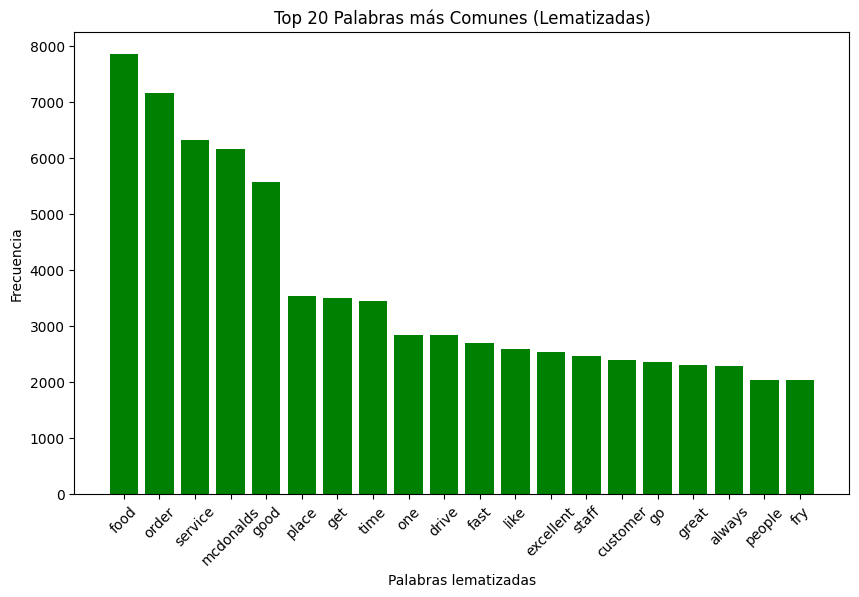

In [ ]:
# Importamos matplotlib para la visualización
import matplotlib.pyplot as plt

# Obtenemos las 20 palabras más comunes y sus frecuencias
palabras_lem, frecuencias_lem = zip(*frecuencia_palabras_lematizadas.most_common(20))

# Creamos el gráfico de barras
plt.figure(figsize=(10, 6))  # Ajustamos el tamaño del gráfico
plt.bar(palabras_lem, frecuencias_lem, color='green')

# Añadimos etiquetas y título
plt.xlabel('Palabras lematizadas')
plt.ylabel('Frecuencia')
plt.title('Top 20 Palabras más Comunes (Lematizadas)')

# Rotamos las etiquetas del eje X para que se lean mejor
plt.xticks(rotation=45)

# Mostramos el gráfico
plt.show()

# ¿Que hubiera pasado si creabamos este gráfico con los datos originales?


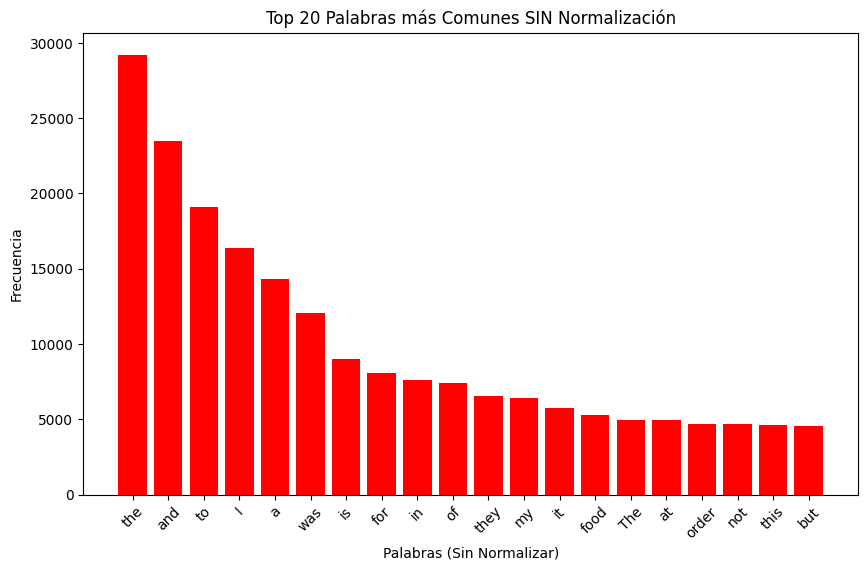

In [ ]:
# ¿Que hubiera pasado si creabamos este gráfico con los datos originales?
import matplotlib.pyplot as plt
from collections import Counter

# Tokenizamos sin normalizar (sin pasar a minúsculas, sin quitar puntuación)
tokens_sin_normalizar = [token for review in df['review'] for token in review.split()]

# Contamos la frecuencia de cada palabra
frecuencia_sin_normalizar = Counter(tokens_sin_normalizar)

# Obtenemos las 20 palabras más comunes y sus frecuencias
palabras_sin_norm, frecuencias_sin_norm = zip(*frecuencia_sin_normalizar.most_common(20))

# Creamos el gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(palabras_sin_norm, frecuencias_sin_norm, color='red')  # Color rojo para marcar que está "mal"

# Añadimos etiquetas y título
plt.xlabel('Palabras (Sin Normalizar)')
plt.ylabel('Frecuencia')
plt.title('Top 20 Palabras más Comunes SIN Normalización')

# Rotamos las etiquetas del eje X para que se lean mejor
plt.xticks(rotation=45)

# Mostramos el gráfico
plt.show()
